## Chloe's Explore Notebook for the NLP Group Project - PAIGE EDIT

### Imports

In [2]:
import pandas as pd
import numpy as np

# Scraping
import requests
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import nltk.sentiment

from wordcloud import WordCloud

# Regex
import re

# Time
from time import strftime

import unicodedata
import json
from pprint import pprint

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Imports
import acquire 
from prepare import *

import nltk.sentiment

# Turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# pd.set_option('display.max_colwidth', -1)

### Acquire

In [3]:
# acquire.scrape_github_data()

In [4]:
# df = pd.DataFrame(acquire.scrape_github_data(),columns=['repo','language','readme_contents'])
# df.head()


In [5]:
df = pd.read_json('repo_readmes.json')

In [6]:
df.shape

(960, 3)

In [7]:
original = pd.read_json('repo_readmes.json')
print(original)

                              repo    language  \
0                  bitcoin/bitcoin         C++   
1          bitcoinbook/bitcoinbook    AsciiDoc   
2                bitcoinj/bitcoinj        Java   
3                     bitcoin/bips    Wikitext   
4          bitcoinjs/bitcoinjs-lib  TypeScript   
..                             ...         ...   
955              spesmilo/electrum      Python   
956  bitcoin-wallet/bitcoin-wallet        Java   
957        etotheipi/BitcoinArmory         C++   
958    bitcoin-dot-org/Bitcoin.org        HTML   
959               jgarzik/cpuminer           C   

                                       readme_contents  
0    Bitcoin Core integration/staging tree\n=======...  
1    Code Examples: ![travis_ci](https://travis-ci....  
2    [![Github Build Status](https://github.com/bit...  
3    People wishing to submit BIPs, first should pr...  
4    # BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...  
..                                                 ...  


### Prepare

In [8]:
df.head()

,repo,language,readme_contents
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....
2,bitcoinj/bitcoinj,Java,[![Github Build Status](https://github.com/bit...
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...


In [9]:
# if you want to see the whole column contents:
# pd.set_option('display.max_colwidth', -1)

In [10]:
# how many language observations do we have?

df.language.value_counts(normalize = True)

C++           0.2
Java          0.2
Wikitext      0.1
HTML          0.1
TypeScript    0.1
AsciiDoc      0.1
Python        0.1
C             0.1
Name: language, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             960 non-null    object
 1   language         960 non-null    object
 2   readme_contents  960 non-null    object
dtypes: object(3)
memory usage: 30.0+ KB


In [12]:
# combine all contents in single string by language

from prepare import *

java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
c_plus_plus__words = basic_clean(' '.join(df[df.language == 'C++'].readme_contents))
wiki_words = basic_clean(' '.join(df[df.language == 'Wikitext '].readme_contents))
type_words = basic_clean(' '.join(df[df.language == 'TypeScript'].readme_contents))
c_words = basic_clean(' '.join(df[df.language == 'C'].readme_contents))
ascii_words = basic_clean(' '.join(df[df.language == 'AsciiDoc'].readme_contents))
python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
html_words = basic_clean(' '.join(df[df.language == 'HTML'].readme_contents))
all_words = basic_clean(' '.join(df.readme_contents))

In [13]:
# all_words

### Explore

In [14]:
# represent contents as word frequencies

java_freq = pd.Series(java_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus__words.split()).value_counts()
wiki_freq = pd.Series(wiki_words.split()).value_counts()
type_freq = pd.Series(type_words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
ascii_freq = pd.Series(ascii_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()

all_freq = pd.Series(all_words.split()).value_counts()


In [15]:

word_counts = pd.concat([java_freq, c_plus_plus_freq, wiki_freq, type_freq,c_freq, ascii_freq, python_freq, html_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['Java', 'C++', 'Wiki', 'Type', 'C', 'ASCII', 'Python', 'HTML', 'ALL']
word_counts.head()

,Java,C++,Wiki,Type,C,ASCII,Python,HTML,ALL
0,0,0,0,288,0,0,0,0,384
1,0,0,0,96,0,96,0,0,288
10,0,0,0,0,0,96,0,0,96
11,672,0,0,0,0,96,0,0,768
12,0,0,0,0,0,96,0,0,96


In [16]:
word_counts['Python'].sum()

43776

In [17]:
python_words

'electrum  lightweight bitcoin client\n\n\n\n\n  licence mit licence\n  author thomas voegtlin\n  language python  36\n  homepage httpselectrumorg\n\n\n image httpsapicirruscicomgithubspesmiloelectrumsvgbranchmaster\n    target httpscirruscicomgithubspesmiloelectrum\n    alt build status\n image httpscoverallsioreposgithubspesmiloelectrumbadgesvgbranchmaster\n    target httpscoverallsiogithubspesmiloelectrumbranchmaster\n    alt test coverage statistics\n image httpsd322cqt584bo4ocloudfrontnetelectrumlocalizedsvg\n    target httpscrowdincomprojectelectrum\n    alt help translate electrum online\n\n\n\n\n\ngetting started\n\n\nif youve come here looking to simply run electrum you may download it here_\n\n _you may download it here httpselectrumorgdownload\n\nelectrum itself is pure python and so are most of the required dependencies\nbut not everything the following sections describe how to run from source but here\nis a tldr\n\n    sudo aptget install libsecp256k10\n    python3 m pip i

In [18]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words.split(), 2))
.value_counts()
.head(20))

top_20_python_bigrams.head()

(aptget, install)    672
(sudo, aptget)       672
(pip, install)       288
(on, your)           288
(if, you)            288
dtype: int64

In [19]:
top_20_python_trigrams = (pd.Series(nltk.ngrams(python_words.split(), 3))
.value_counts()
.head(20))

top_20_python_trigrams.head()

(sudo, aptget, install)    672
(python3, m, pip)          288
(pip, install, user)       288
(m, pip, install)          288
(run, electrum, from)      192
dtype: int64

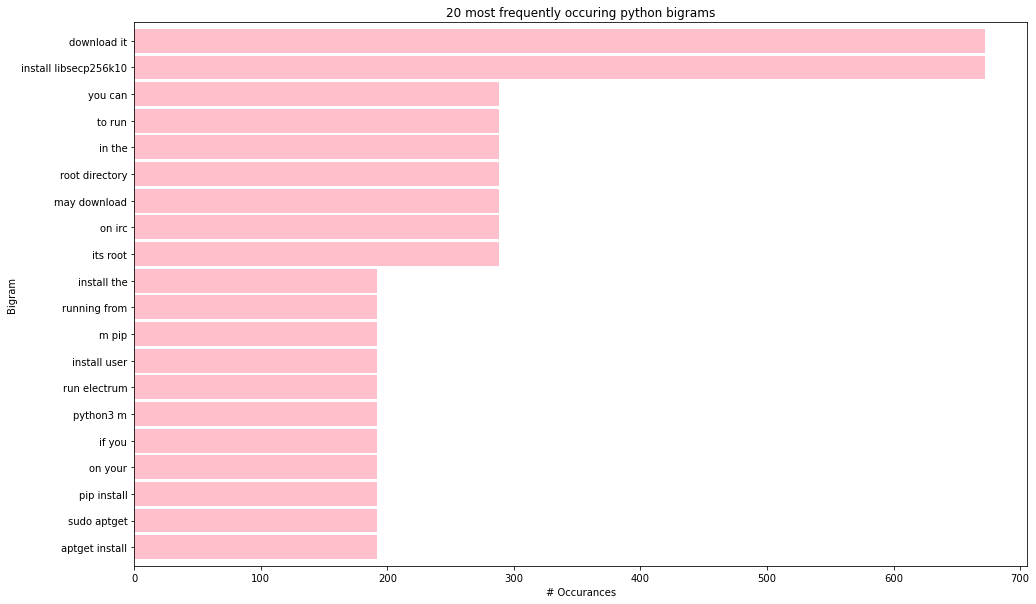

In [20]:
top_20_python_bigrams.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))

plt.title('20 most frequently occuring python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

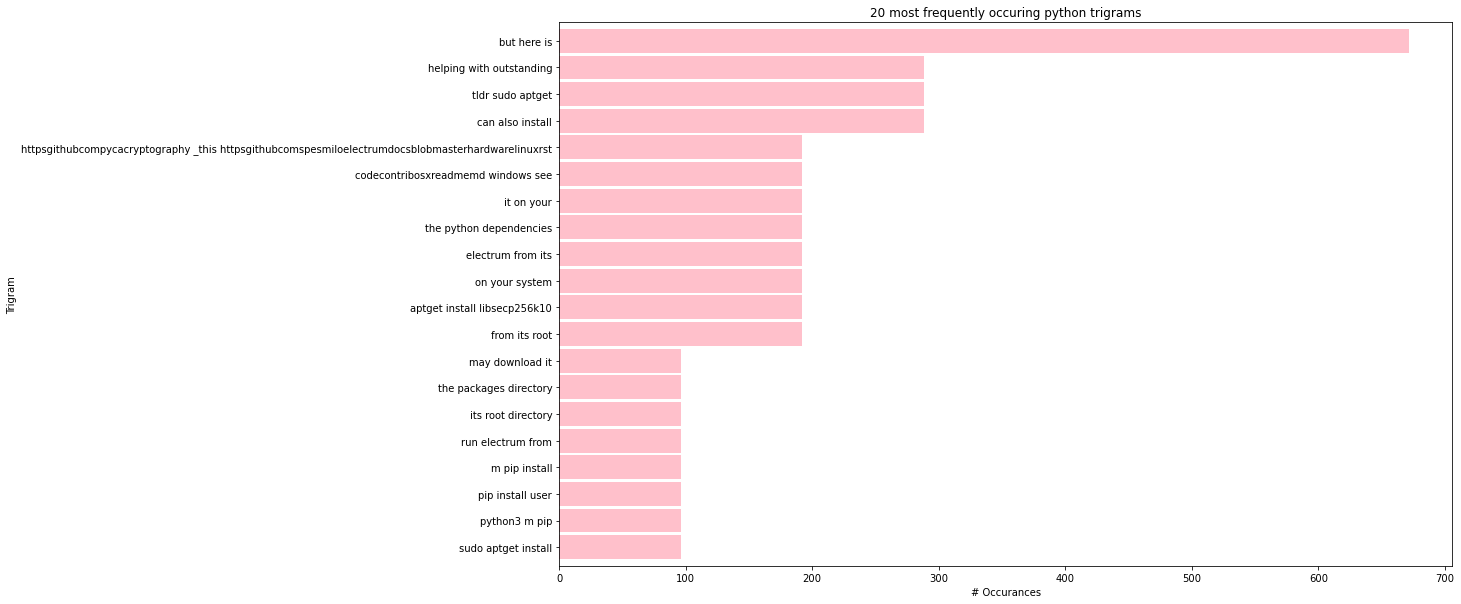

In [21]:
top_20_python_trigrams.sort_values().plot.barh(color = 'pink', width = .9, figsize = (16,10))

plt.title('20 most frequently occuring python trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_python_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

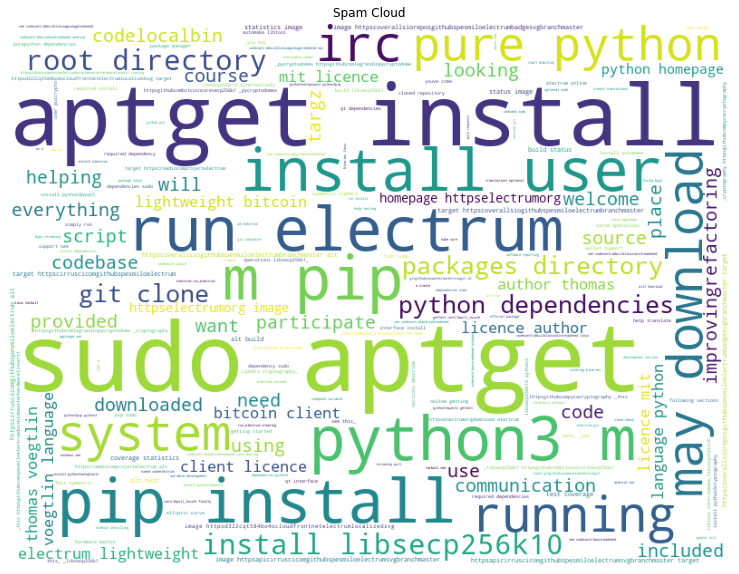

In [22]:
python_cloud = WordCloud(background_color='white', height = 600, width = 800).generate(' '.join(python_words.split()))

plt.figure(figsize = (16,10))
plt.title('Spam Cloud')
plt.imshow(python_cloud)
plt.axis('off')
plt.show()

In [23]:
# looking at sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [24]:
df.head()

,repo,language,readme_contents
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....
2,bitcoinj/bitcoinj,Java,[![Github Build Status](https://github.com/bit...
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...


In [25]:
df['sentiment'] = df.readme_contents.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

,repo,language,readme_contents,sentiment
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...,0.9897
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....,0.9930
2,bitcoinj/bitcoinj,Java,[![Github Build Status](https://github.com/bit...,0.9823
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr...",-0.9975
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...,0.9981


In [26]:
df.groupby('language').sentiment.agg(['mean', 'median'])

,mean,median
language,,
AsciiDoc,0.99300,0.99300
C,0.45880,0.45880
C++,0.98125,0.98125
HTML,0.91680,0.91680
Java,0.94900,0.94900
Python,0.99380,0.99380
TypeScript,0.99810,0.99810
Wikitext,-0.99750,-0.99750


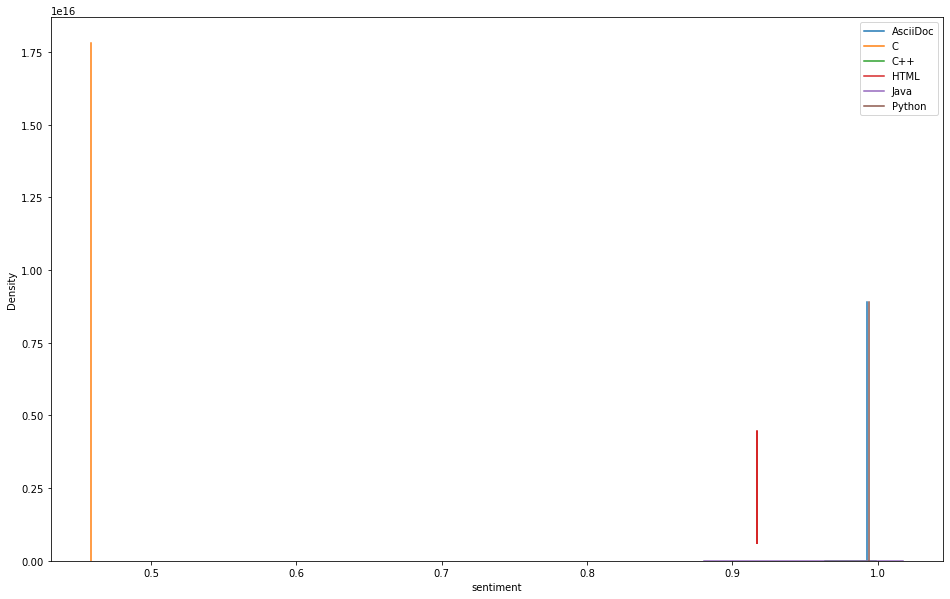

In [27]:
# is the distribution 
plt.figure(figsize = (16,10))
sns.kdeplot(df[df.language == 'AsciiDoc'].sentiment, label = 'AsciiDoc')
sns.kdeplot(df[df.language == 'C'].sentiment, label = 'C')
sns.kdeplot(df[df.language == 'C++'].sentiment, label = 'C++')
sns.kdeplot(df[df.language == 'HTML'].sentiment, label = 'HTML')
sns.kdeplot(df[df.language == 'Java'].sentiment, label = 'Java')
sns.kdeplot(df[df.language == 'Python'].sentiment, label = 'Python')
#sns.kdeplot(df[df.language == 'TypeScript'].sentiment, label = 'TypeScript')
#sns.kdeplot(df[df.language == 'Wikitext'].sentiment, label = 'Wikitext')
plt.legend(['AsciiDoc', 'C', 'C++', 'HTML', 'Java', 'Python'])

# TF-IDF

## If a word only appears in a small number of repos, then it could be representative of an underlying trend?

In [31]:
df.head()

,repo,language,readme_contents,sentiment
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...,0.9897
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....,0.9930
2,bitcoinj/bitcoinj,Java,[![Github Build Status](https://github.com/bit...,0.9823
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr...",-0.9975
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...,0.9981


In [36]:
# We will create an empty list to store values for us as we iterate through our data
tfs = []

# Start by iterating over all the documents. We can use .items() to speed up our loop:
df['readme_contents'].items()

0      Bitcoin Core integration/staging tree\n=======...
1      Code Examples: ![travis_ci](https://travis-ci....
2      [![Github Build Status](https://github.com/bit...
3      People wishing to submit BIPs, first should pr...
4      # BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...
                             ...                        
955    Electrum - Lightweight Bitcoin client\n=======...
956    # BITCOIN WALLET\n\nWelcome to _Bitcoin Wallet...
957    ##Armory\n\n**Created by Alan Reiner on 13 Jul...
958    # Welcome to Bitcoin.org's Codebase\n\nCurrent...
959    \nThis is a multi-threaded CPU miner for bitco...
Name: readme_contents, Length: 960, dtype: object

In [37]:
# Create a for loop
for doc, text in df['readme_contents'].items():
    # We will make a dataframe that contains the term frequency for every word
    contents_idf = (pd.Series(text.split())
          .value_counts()
          .reset_index()
          .set_axis(['word', 'raw_count'], axis=1, inplace=False)
          .assign(tf=lambda df['readme_contents']: df['readme_contents'].raw_count / df['readme_contents'].shape[0])
          .drop(columns='raw_count')
          .assign(doc=doc))
    # Then add that data frame to our list
    tfs.append(contents_idf)

SyntaxError: invalid syntax (<ipython-input-37-4ac69480443d>, line 8)